In [38]:
# import numpy as np
# import pandas as pd
# from scipy.signal import find_peaks, savgol_filter

# def is_single_peak(event, smooth=True, window_length=5, polyorder=2, prominence=0.5):
#     """
#     Check if the rainfall event has a single peak.

#     Parameters:
#         event (array-like): Rainfall intensities.
#         smooth (bool): Whether to smooth the event before peak detection.
#         window_length (int): Window size for Savitzky-Golay filter.
#         polyorder (int): Polynomial order for Savitzky-Golay filter.
#         prominence (float): Minimum prominence of a peak.

#     Returns:
#         bool: True if exactly one peak is found, else False.
#     """
#     event = np.array(event)

#     # Avoid errors on too-short events
#     if len(event) < window_length:
#         return False

#     # Smooth the signal to suppress noise
#     if smooth:
#         event = savgol_filter(event, window_length=window_length, polyorder=polyorder)

#     # Find peaks
#     peaks, _ = find_peaks(event, prominence=prominence)

#     return len(peaks) == 1

# def filter_single_peak_events(events_df, intensity_column='intensities'):
#     """
#     Filters DataFrame of rainfall events to only include single-peak events.

#     Parameters:
#         events_df (pd.DataFrame): DataFrame with a column of rainfall event intensities.
#         intensity_column (str): Name of column containing the list/array of intensities.

#     Returns:
#         pd.DataFrame: Filtered DataFrame with only single-peak events.
#     """
#     return events_df[events_df[intensity_column].apply(is_single_peak)]


# data = {
#     'event_id': [1, 2, 3],
#     'intensities': [
#         [0, 2, 5, 3, 1, 0],          # Single peak
#         [0, 2, 5, 4, 6, 2, 0],       # Two peaks
#         [0, 1, 0, 0, 5, 0, 0]        # Single sharp peak
#     ]
# }
# df = pd.DataFrame(data)

# filtered = filter_single_peak_events(df)
# print(filtered)

   event_id            intensities
0         1     [0, 2, 5, 3, 1, 0]
1         2  [0, 2, 5, 4, 6, 2, 0]
2         3  [0, 1, 0, 0, 5, 0, 0]


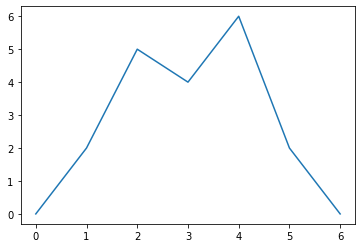

In [36]:
plt.plot(filtered['intensities'][1])

In [30]:
data

{'event_id': [1, 2, 3],
 'intensities': [[0, 2, 5, 3, 1, 0],
  [0, 2, 5, 4, 6, 2, 0],
  [0, 1, 0, 0, 5, 0, 0]]}

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

from ClassFunctions import precip_time_series, rainfall_analysis
from PlottingFunctions import *

## Create object containing rainfall events for one gauge

In [2]:
file = '/nfs/a319/gy17m2a/PhD/datadir/DanishRainData/532020_precip_minute.csv'
ts = precip_time_series(file)
ts.pad_and_resample('5min')
analysis = rainfall_analysis('5h', ts)

100%|█████████████████████████████████████████████████████████████████████████████████| 219746/219746 [01:10<00:00, 3100.70it/s]


In [22]:
all_events=[]
analysis.get_metrics()
df = pd.DataFrame(analysis.metrics)
all_events.append(df)
all_events_df = pd.concat(all_events)

In [23]:
# del all_events_df['min_intensity']
# del all_events_df['BSC']
# del all_events_df['BSC_Index']
# del all_events_df['BSC_DMC']

In [27]:
i=3
all_events_df['5th_w_peak_DMC'][i], all_events_df['5th_w_peak'][i], 

(5, 5)

Text(0, 0.5, '% Dimensionless intensity')

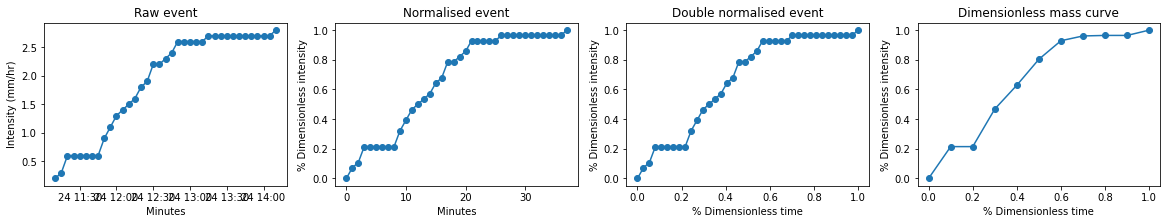

In [64]:
i=8
event =ts.return_specific_event(i)
normalised_event=ts.normalised_events[i]
dbl_normalised_event=ts.double_normalised_events[i]
dmc = ts.DMCs[i]

fig,ax=plt.subplots(ncols=4, figsize=(20,3))
ax[0].plot(np.cumsum(event))
ax[0].scatter(event.index, np.cumsum(event))
ax[0].set_title("Raw event")
ax[0].set_xlabel('Minutes')
ax[0].set_ylabel('Intensity (mm/hr)')

ax[1].plot(normalised_event)
ax[1].scatter(range(0,len(normalised_event)), normalised_event)
ax[1].set_title("Normalised event")
ax[1].set_xlabel('Minutes')
ax[1].set_ylabel('% Dimensionless intensity')

ax[2].plot(dbl_normalised_event)
ax[2].scatter(dbl_normalised_event.index, dbl_normalised_event)
ax[2].set_title("Double normalised event")
ax[2].set_xlabel('% Dimensionless time')
ax[2].set_ylabel('% Dimensionless intensity')

ax[3].plot(np.cumsum(dmc))
ax[3].scatter(dmc.index, np.cumsum(dmc))
ax[3].set_title("Dimensionless mass curve")
ax[3].set_xlabel('% Dimensionless time')
ax[3].set_ylabel('% Dimensionless intensity')

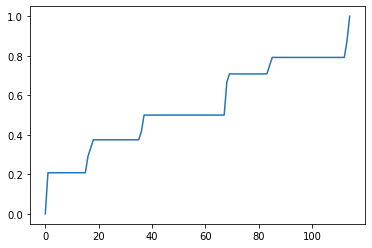

In [19]:
normalised_event =ts.normalised_events[12]
plt.plot(normalised_event)

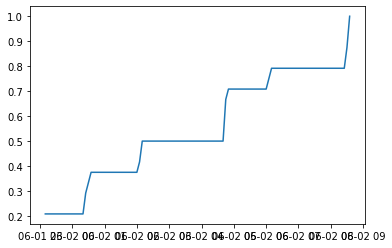

In [24]:
plt.plot(np.cumsum(raw_event['precipitation (mm/hr)']) / np.sum(raw_event['precipitation (mm/hr)']))

In [25]:
print(all_events_df['5th_w_peak'][12], all_events_df['5th_w_peak_DMC'][12])

5 1


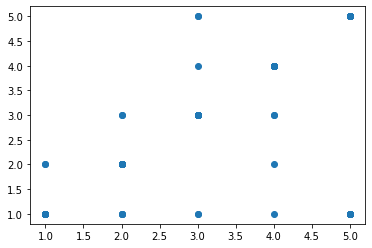

In [5]:
plt.scatter(all_events_df['5th_w_peak'], all_events_df['5th_w_peak_DMC'], )

In [6]:
# del all_events_df['min_intensity']
# del all_events_df['BSC']

In [59]:
all_events_df.iloc[:,85:87]

,ARR_Thirds,ARR_Thirds_DMC
0,1,1
1,2,2
2,3,3
3,3,3
4,3,3
...,...,...
319,3,3
320,2,2
321,3,3
322,2,2


In [5]:
nan_rows = all_events_df[all_events_df['ARR_Thirds'].isna()]

NameError: name 'all_events_df' is not defined

In [12]:
len(normalised_event)

11

In [20]:
time_percent = np.arange(len(normalised_event)) / (len(normalised_event) - 1) * 100
time_percent

array([  0.        ,   7.14285714,  14.28571429,  21.42857143,
        28.57142857,  35.71428571,  42.85714286,  50.        ,
        57.14285714,  64.28571429,  71.42857143,  78.57142857,
        85.71428571,  92.85714286, 100.        ])

In [8]:
def calc_dX_with_interpolation(normalised_event, percentile):
    """
    Calculates the time (as a % of event duration) at which a given percentile
    of cumulative rainfall is reached, using linear interpolation.
    """

    # Create a time axis from 0 to 100% matching the length of the rainfall curve
    time_percent = np.linspace(0, 100, len(normalised_event))

    # Identify indices below and above the target percentile
    below = np.where(normalised_event < percentile)[0]
    above = np.where(normalised_event >= percentile)[0]

    # Check if interpolation is possible
    if len(below) > 0 and len(above) > 0:
        i_below = below[-1]  # Last index below percentile
        i_above = above[0]   # First index above percentile

        # Values at those indices
        y1, y2 = normalised_event[i_below], normalised_event[i_above]
        x1, x2 = time_percent[i_below], time_percent[i_above]

        # Linear interpolation formula to find x where y = percentile
        slope = (y2 - y1) / (x2 - x1)
        x_at_percentile = x1 + (percentile - y1) / slope

        return x_at_percentile

    # Return None if no valid interpolation range is found
    return None

def calc_d50_with_interpolation(sample):
    n=5
    cumulative_rainfall, cumulative_rainfall_times = create_cumulative_event(sample)
    dimensionless_cumulative_rainfall, dimensionless_times =  create_dimensionless_event(cumulative_rainfall, cumulative_rainfall_times)
    interpolated_n_cumulative_rainfall, interpolated_n_times = interpolate_rainfall(dimensionless_cumulative_rainfall,n)
    interpolated_n_incremental_rainfall = create_incremental_event(interpolated_n_cumulative_rainfall)
    max_quintile_profile = find_part_with_most_rain(interpolated_n_incremental_rainfall, n)
    
    percentile = 0.5
    
    time_percentage = (np.arange(0, len(sample) + 1) / len(sample)) * 100
    
    # Find the indices where the cumulative rainfall crosses the percentile_value
    indices_below = np.where(dimensionless_cumulative_rainfall < percentile)[0]
    indices_above = np.where(dimensionless_cumulative_rainfall >= percentile)[0]

    # Ensure there are indices both below and above the percentile value
    if len(indices_below) > 0 and len(indices_above) > 0:
        index_below = indices_below[-1]  # Last index below the percentile value
        index_above = indices_above[0]    # First index above the percentile value

        # Perform linear interpolation to find the exact intersection point
        x_below = time_percentage[index_below]
        y_below = dimensionless_cumulative_rainfall[index_below]

        x_above = time_percentage[index_above]
        y_above = dimensionless_cumulative_rainfall[index_above]

        # Calculate the slope
        slope = (y_above - y_below) / (x_above - x_below)
        # Use the formula to find the exact x value where the y value equals percentile_value
        time_for_percentile = x_below + (percentile - y_below) / slope

        return time_for_percentile


In [77]:
below = np.where(normalised_event < percentile)[0]
print(below)
above = np.where(normalised_event >= percentile)[0]
print(above)

[]
[ 0  1  2  3  4  5  6  7  8  9 10]


In [7]:
event.values

array([[0.6],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0. ],
       [0.4],
       [0.1]])

In [9]:
event=ts.raw_events[109]
normalised_event = np.cumsum(event['precipitation (mm/hr)']) / np.sum(event['precipitation (mm/hr)'])
percentile = 0.5  # 50% of total rainfall
time_for_percentile = calc_dX_with_interpolation(normalised_event, percentile)
time_for_percentile

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


0.0

In [ ]:
([self.calc_ARR_thirds(np.cumsum(event['precipitation (mm/hr)']) / np.sum(event['precipitation (mm/hr)'])) for event in self.ts.raw_events]

In [ ]:
fig, axs = plt.subplots(nrows=8, ncols=6, figsize=(20, 15))

for ax_num, ax in enumerate(axs.flatten()):
    if ax_num < len(comparison_df['metric']):
        metric = comparison_df['metric'][ax_num]
        
        x = all_events_df[metric]
        y = all_events_df[f'{metric}_DMC']
        
        # Remove NaNs
        mask = ~x.isna() & ~y.isna()
        x = x[mask]
        y = y[mask]
        
        # Density plot
        sns.histplot(x=x, y=y, bins=30, pmax=0.9, ax=ax, cmap="viridis", cbar=False)
        
        ax.set_title(metric)
        ax.set_xlabel('Raw')
        ax.set_ylabel('DMC')
    else:
        ax.set_axis_off()

plt.tight_layout()
fig.savefig("DMC_Raw_Comparison.png", facecolor='white', edgecolor='white', dpi=300)